In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 모델링

In [2]:
df_pre = pd.read_csv('data/df_pre.csv')
print(np.shape(df_pre))
df_pre.tail()

(26729, 23)


,Unnamed: 0,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


In [3]:
del df_pre['Unnamed: 0']

In [4]:
print(np.shape(df_pre))
df_pre.tail()

(26729, 22)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


# Random Forest (전체 feature importances) 

In [7]:
columns = ['Name', 'DateTime','AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color', 'Color_pre', 'DayuponOutcome','AboutAge','BreedMix','Breed_pre','Year','Month','YearMonth','Season','Quarter','Group','Size']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = ExtraTreesClassifier(n_estimators=300, random_state=0)
rf.fit(df_x, df_y)
#rf_probs = rf.predict_proba(X_test)

#print('train score: {}'.format(rf.score(X_train, y_train)))
#print('test score: {}'.format(rf.score(X_test, y_test)))
#print('log loss: {}'.format(log_loss(y_test, rf_probs)))
#print()

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 3 (0.144483)
2. feature 1 (0.134562)
3. feature 6 (0.089379)
4. feature 8 (0.071390)
5. feature 0 (0.067074)
6. feature 7 (0.065688)
7. feature 4 (0.051444)
8. feature 5 (0.050968)
9. feature 14 (0.043528)
10. feature 11 (0.041507)
11. feature 13 (0.040587)
12. feature 9 (0.034577)
13. feature 17 (0.034256)
14. feature 18 (0.031845)
15. feature 2 (0.024653)
16. feature 15 (0.023578)
17. feature 16 (0.022799)
18. feature 12 (0.018808)
19. feature 10 (0.008874)


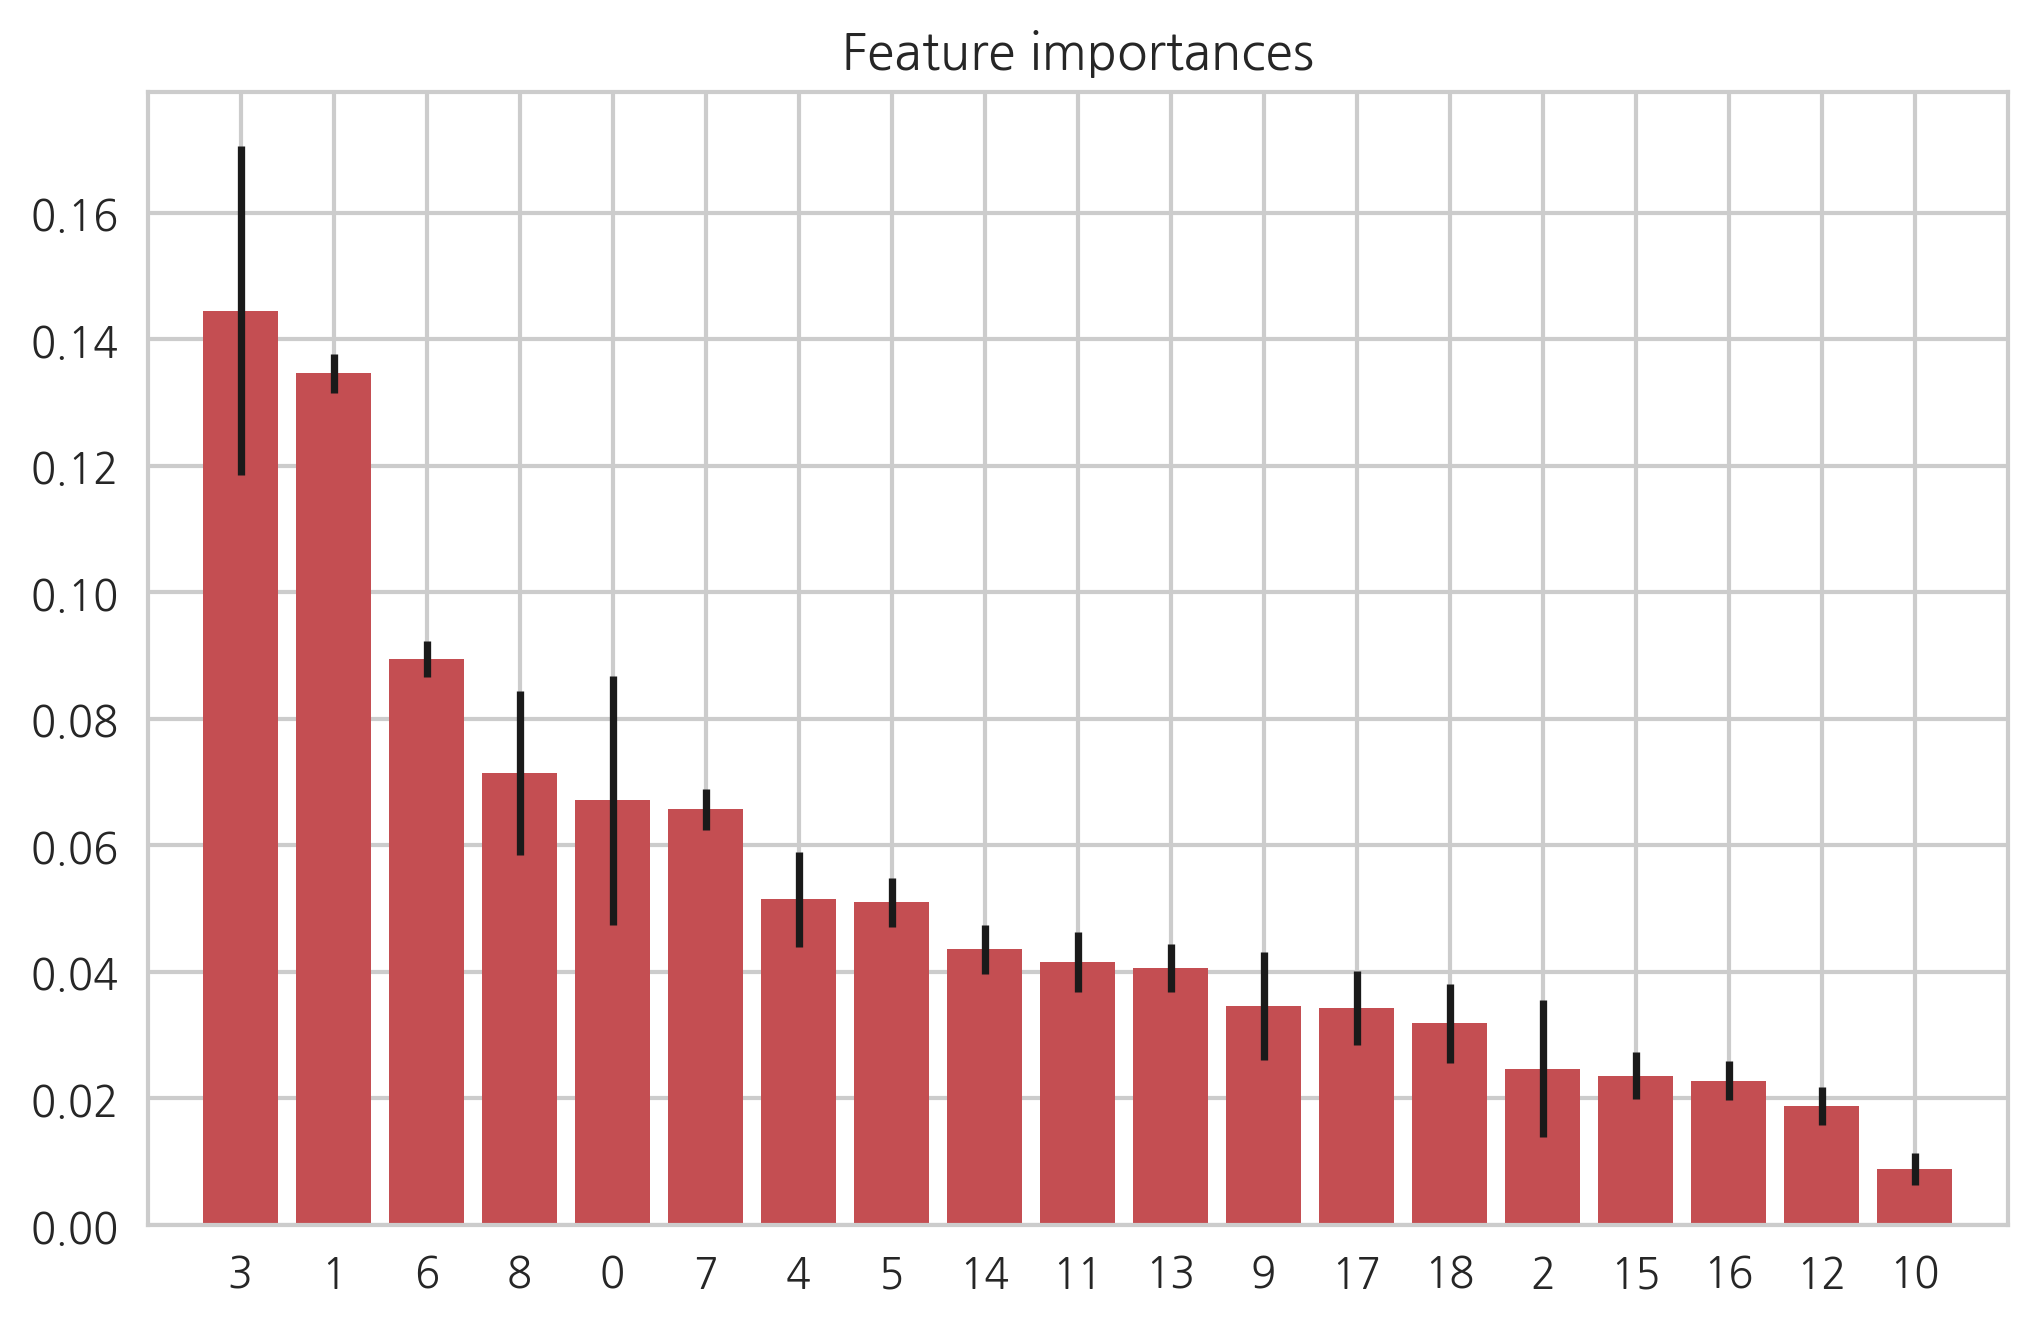

In [8]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(df_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

# Random Forest 

- feature importance mean 기준으로 0.05이상인 변수만 사용하였을때
- ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

In [9]:
df_x.iloc[0, [3,1,8,6,0,7,14,4,0,5,11]]

SexuponOutcome       2
DateTime          3361
DayuponOutcome     365
Color              130
Name                 1
Color_pre            2
YearMonth            4
AgeuponOutcome       5
Name                 1
Breed             1221
Breed_pre          181
Name: 0, dtype: int64

In [13]:
columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=1000, max_features=6, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

train score: 1.0
test score: 0.6279461279461279
log loss: 0.9736536512728773



# AdaBoost 

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

model_ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=0), 
                               algorithm="SAMME", n_estimators=300)
model_ada.fit(X_train, y_train)
model_ada_probs = model_ada.predict_proba(X_test)

print('train score: {}'.format(model_ada.score(X_train, y_train)))
print('test score: {}'.format(model_ada.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_ada_probs)))
print()

train score: 1.0
test score: 0.5596707818930041
log loss: 1.5247705012978447



# Random Forest 

- 1 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

In [54]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5555555555555556
log loss: 1.8783832389364936



- 2 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month']

In [55]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5589225589225589
log loss: 1.7170981928568472



- 3 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth']

In [56]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5632248410026188
log loss: 1.5379631569883232



- 4 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season']

In [57]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8146658560538745
test score: 0.5538720538720538
log loss: 1.9324877419822



- 5 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter']

In [58]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8142917270729084
test score: 0.5544332210998878
log loss: 1.987696300439277



- 6 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

In [5]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7025206940092596
test score: 0.5284324728769173
log loss: 1.969618631399007



- 7 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

In [8]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7749146518262171
test score: 0.5145903479236813
log loss: 1.9821968064766362



- 8 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

In [7]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8252817658887902
test score: 0.5216984661429106
log loss: 1.9294567976580403



- 9 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

In [9]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7130898377215545
test score: 0.5198279087167976
log loss: 1.9335018433205342



- 10 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

In [10]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7138380956834869
test score: 0.5200149644594089
log loss: 1.9571902704406532



- 11 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

In [11]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5591096146651702
log loss: 1.906976682291443



- 12 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

In [12]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5679012345679012
log loss: 1.7606278281994434



- 13 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

In [13]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5714552936775159
log loss: 1.5198682544580564



# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

model = LogisticRegression().fit(X_train, y_train)
model_probs = model.predict_proba(X_test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

train score: 0.56331060857998
test score: 0.5664047886270108
log loss: 1.0485084178130732



# Gradient Boosting 

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

model_grad = GradientBoostingClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)
model_probs = model_grad.predict_proba(X_test)

print('train score: {}'.format(model_grad.score(X_train, y_train)))
print('test score: {}'.format(model_grad.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

train score: 0.7768124376454939
test score: 0.6715301159745605
log loss: 0.8472990786298175



# XGBoost 

- 적당한 test size 탐색

In [18]:
import xgboost
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
for_cv = np.linspace(0.1, 0.9, 9)
for i in for_cv:
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=i, random_state=0, shuffle=True)

    model_xgb = xgboost.XGBClassifier(n_estimators=100).fit(X_train, y_train)
    model_probs = model_xgb.predict_proba(X_test)
    print('test size = ', i, '\n')
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, model_probs)))
    print()

test size =  0.1 

train score: 0.6501496508147655
test score: 0.6427235316124205
log loss: 0.8361748305469573

test size =  0.2 

train score: 0.6512650236168919
test score: 0.6419753086419753
log loss: 0.8422015675612203

test size =  0.3 

train score: 0.6504543025120256
test score: 0.6412270856715301
log loss: 0.8474870156396883

test size =  0.4 

train score: 0.6525534701003929
test score: 0.6421623643845866
log loss: 0.8566757387436684

test size =  0.5 

train score: 0.6516761448668064
test score: 0.6424242424242425
log loss: 0.8564755970151559

test size =  0.6 

train score: 0.6537274342905247
test score: 0.6419129567277715
log loss: 0.8564711488490223

test size =  0.7 

train score: 0.6561486655026191
test score: 0.6406926406926406
log loss: 0.859508276350064

test size =  0.8 

train score: 0.6570626753975678
test score: 0.6365506921062477
log loss: 0.8633589029412827

test size =  0.9 

train score: 0.6792664670658682
test score: 0.6314170511701376
log loss: 0.87736393178

- max_feature Test

- 적당한 n_estimators 탐색

In [17]:
from sklearn.model_selection import GridSearchCV

def model_cv(X_train, X_test, y_train, y_test, model_xgb, name):
    model_xgb.fit(X_train, y_train)
    print(name,': ',model_xgb.best_params_)
    pred_y = model_xgb.predict_proba(X_test)
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, pred_y)))
    print()

def xgbc(X_train, X_test, y_train, y_test):
    param = [{'n_estimators' : [500, 750, 1000],
             'learning_rate' : [0.1, 0.2, 0.3],
             'max_depth' : [3, 4, 5]}]
    model_xgb = GridSearchCV(XGBClassifier(), param)
    name = 'XGBoost'
    return model_cv(X_train, X_test, y_train, y_test, model_xgb, name)

In [18]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']


df_x = df_pre[columns]
df_y = df_pre['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.1, random_state=0, shuffle=True)

xgbc(X_train, X_test, y_train, y_test)

XGBoost :  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 1000}
train score: 0.8525523777851679
test score: 0.6704077815188926
log loss: 0.8227070794304204



# Kernel SVM

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

rbf_svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0, probability=True).fit(X_train, y_train)
model_probs = rbf_svc.predict_proba(X_test)

print('train score: {}'.format(rbf_svc.score(X_train, y_train)))
print('test score: {}'.format(rbf_svc.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()


AttributeError: predict_proba is not available when  probability=False

# Keras

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

df_x = df_pre[columns]
df_y = pd.DataFrame(LabelBinarizer().fit_transform(df_pre["OutcomeType"]), 
                    columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], index=df_pre.index)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

In [83]:
print(df_y['Adoption'].value_counts())
print(df_y['Transfer'].value_counts())
print(df_y['Return_to_owner'].value_counts())
print(df_y['Euthanasia'].value_counts())
print(df_y['Died'].value_counts())

0    15960
1    10769
Name: Adoption, dtype: int64
0    17307
1     9422
Name: Transfer, dtype: int64
0    21943
1     4786
Name: Return_to_owner, dtype: int64
0    25174
1     1555
Name: Euthanasia, dtype: int64
0    26532
1      197
Name: Died, dtype: int64


In [ ]:
X_train.describe()

In [85]:
X_train = np_utils.to_categorical(X_train, 6)
X_test = np_utils.to_categorical(X_test, 6)
y_train = np_utils.to_categorical(y_train, 5)
y_test = np_utils.to_categorical(y_test, 5)

IndexError: index 17175 is out of bounds for axis 1 with size 6

In [80]:
X_train

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.]])

In [73]:
X_train.shape

(601400, 6)

In [74]:
y_test.shape

(66825, 5)

In [72]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import regularizers
from keras.layers import Dropout

np.random.seed(0)

model = Sequential()
model.add(Dense(2, input_dim=6, activation="sigmoid", kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(5, activation="sigmoid", kernel_initializer="glorot_uniform"))
model.compile(optimizer=SGD(lr=0.2), loss='categorical_crossentropy', metrics=["accuracy"])

hist = model.fit(X_train, y_train, 
                 epochs=10, batch_size=50, 
                 validation_data=(X_test, y_test), verbose=2)

Train on 601400 samples, validate on 66825 samples
Epoch 1/10
10s - loss: 0.0421 - acc: 0.9925 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 2/10


KeyboardInterrupt: 

In [70]:
model_probs = model.predict_proba(X_test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

10816/13365 [=======================>......] - ETA: 0s

AttributeError: 'Sequential' object has no attribute 'score'

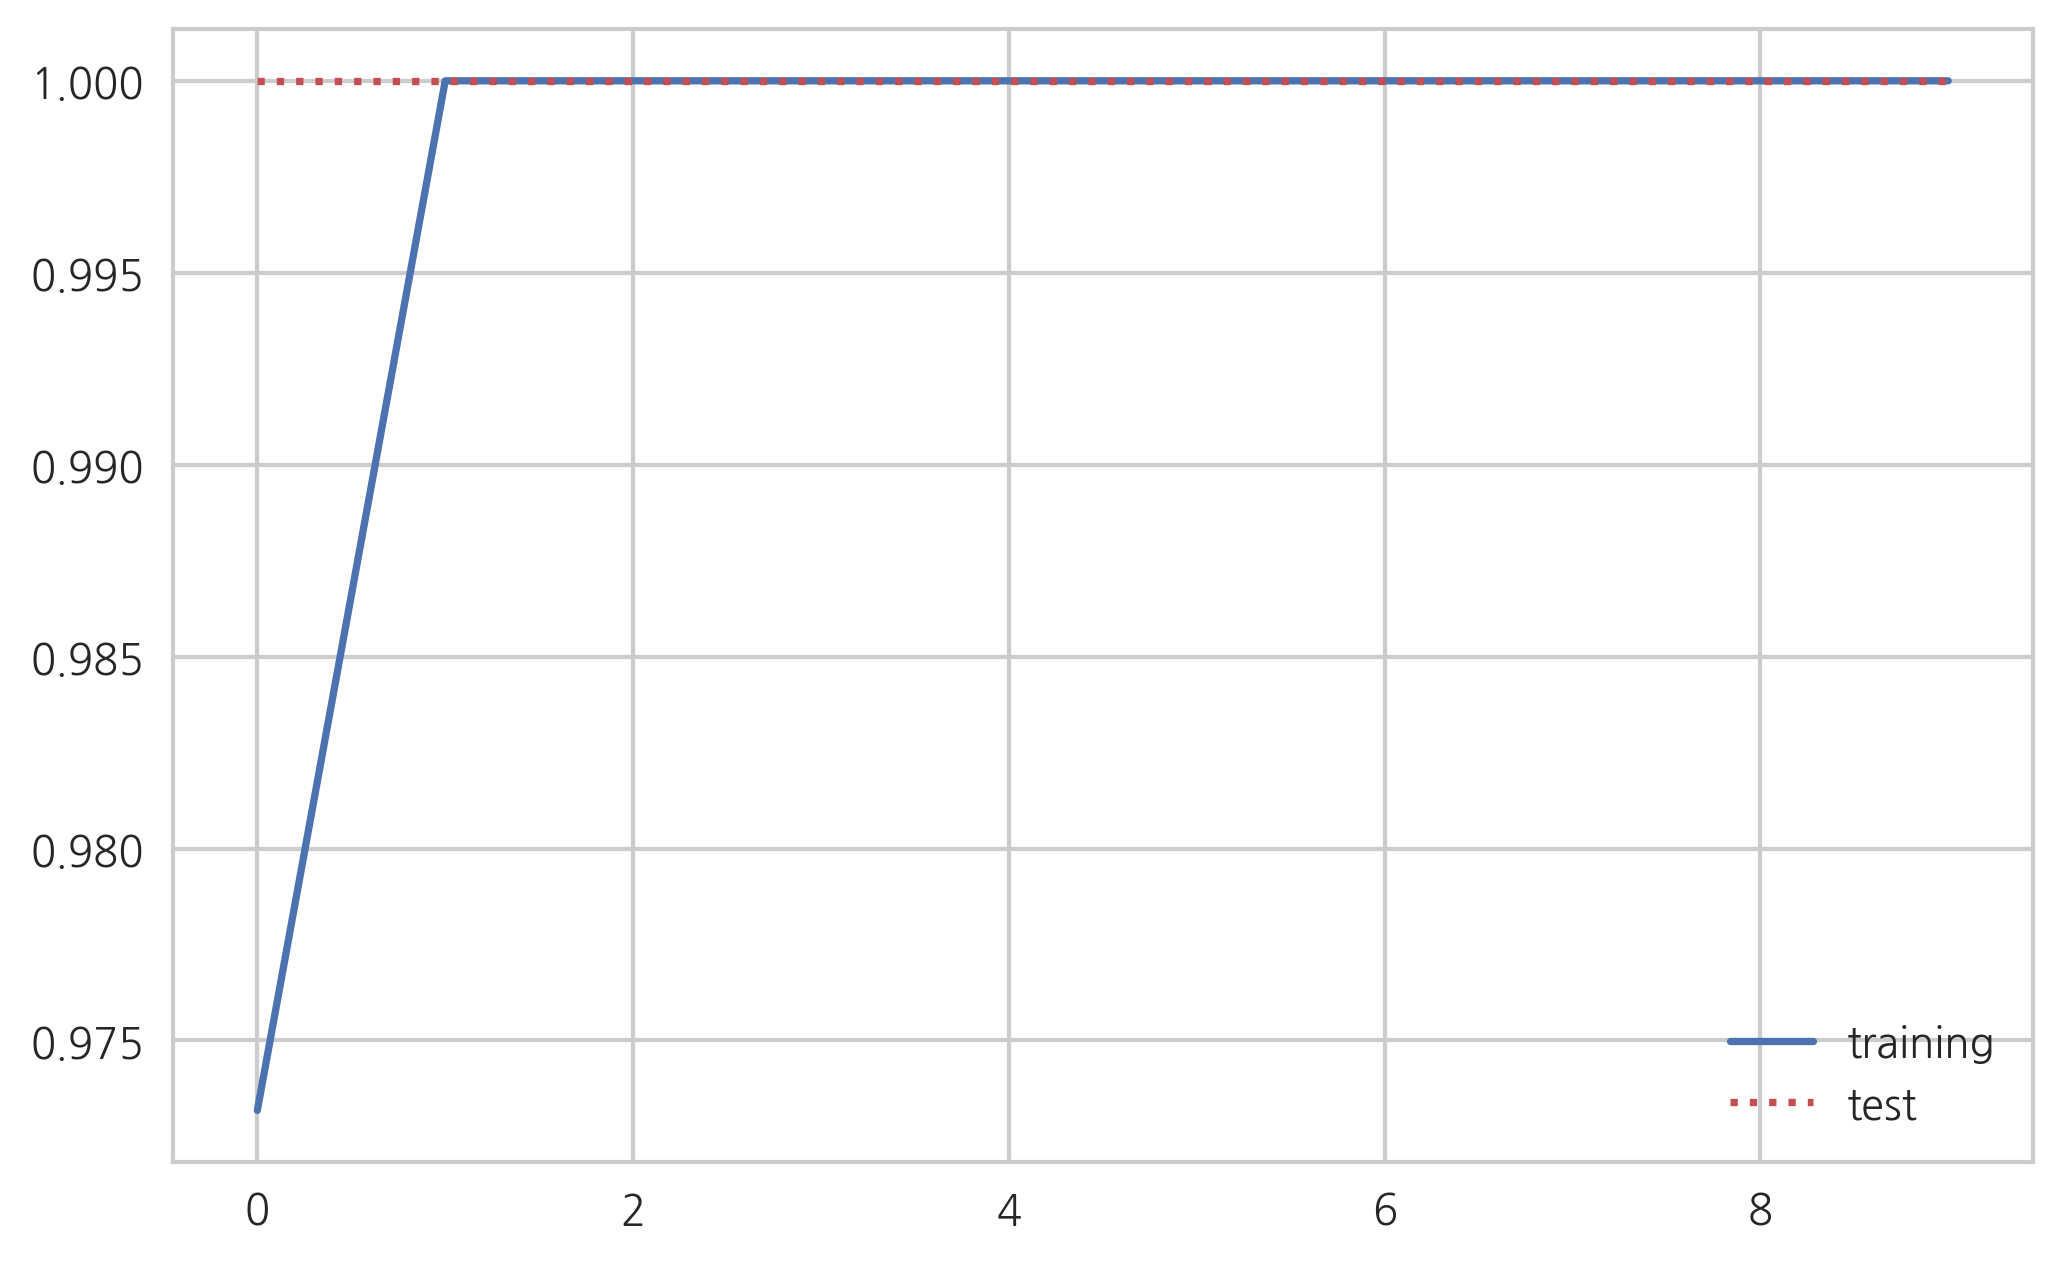

In [69]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()